In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [3]:
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [4]:
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


##  Return Forecasting: Initial Time-Series Plotting

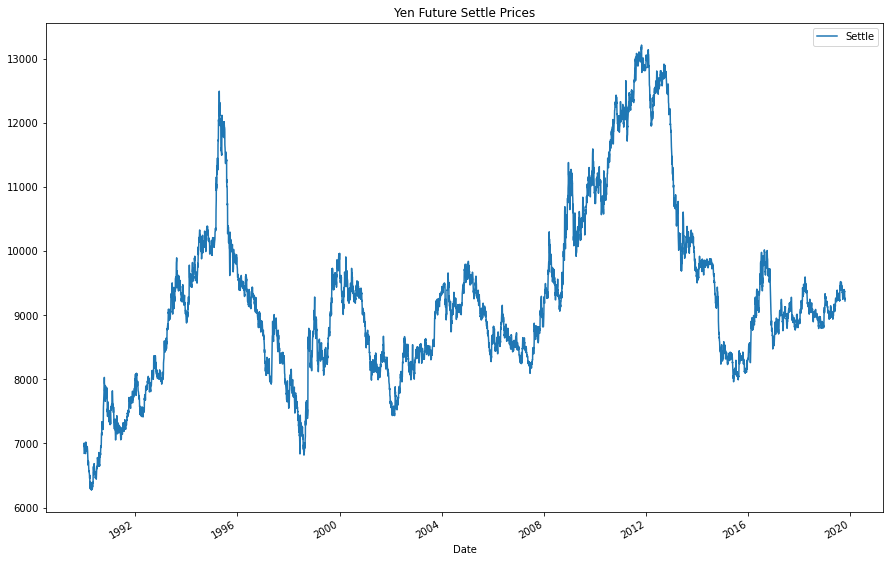

In [6]:
yen_futures.Settle.plot(figsize=[15,10],title='Yen Future Settle Prices',legend=True)

## Decomposition Using a Hodrick-Prescott Filter

In [8]:
import statsmodels.api as sm

In [12]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures['Settle'])

ts_trend.head()

Date
1990-01-02    6908.503967
1990-01-03    6908.799756
1990-01-04    6909.057104
1990-01-05    6909.223948
1990-01-08    6909.310062
Name: Settle_trend, dtype: float64

In [15]:
df_yen_futures = yen_futures[['Settle']].copy()
df_yen_futures['trend'] = ts_trend
df_yen_futures['noise'] = ts_noise
df_yen_futures.tail()

,Settle,trend,noise
Date,,,
2019-10-09,9338.0,9313.060753,24.939247
2019-10-10,9303.5,9309.368559,-5.868559
2019-10-11,9251.0,9305.454594,-54.454594
2019-10-14,9265.0,9301.423060,-36.423060
2019-10-15,9221.5,9297.344123,-75.844123


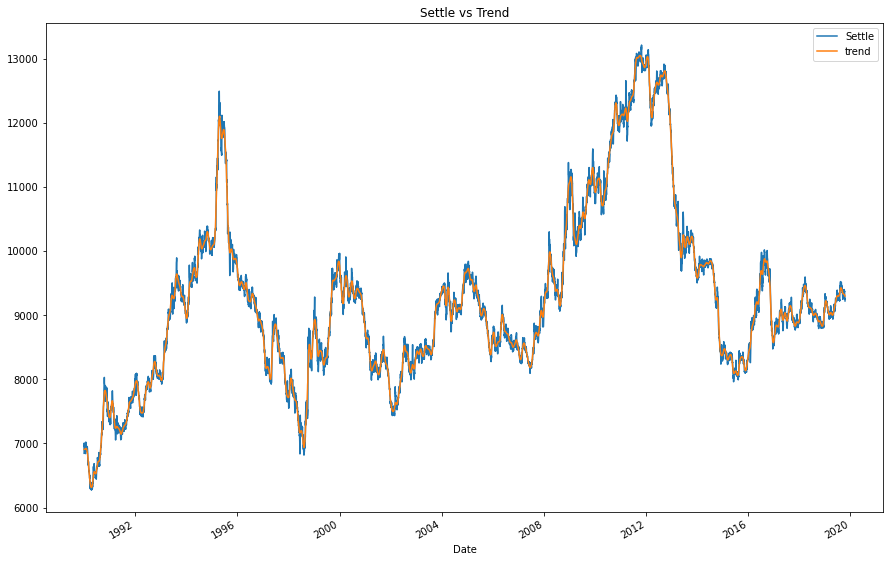

In [16]:
df_yen_futures.plot(y=['Settle', 'trend'],figsize=[15,10],title='Settle vs Trend',legend=True)

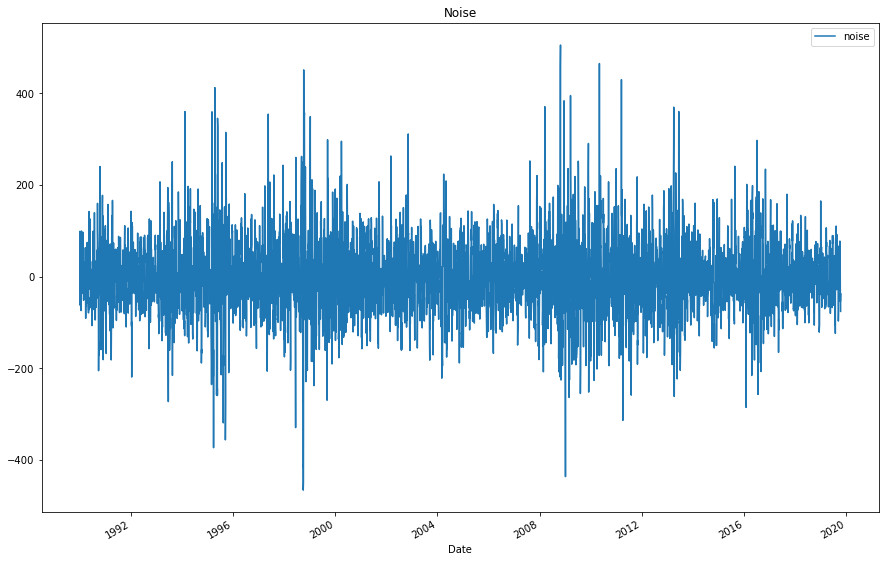

In [17]:
df_yen_futures.plot(y='noise',figsize=[15,10],title='Noise',legend=True)

## Forecasting Returns using an ARMA Model

In [18]:
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [21]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [22]:
model = ARMA(returns.values, order=(2,1))
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Tue, 01 Sep 2020   AIC                          15798.142
Time:                        11:04:52   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3063      1.278     -0.240      0.811      -2.811       2.198
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2948      1.278      0.231      0.818      -2.210       2.799
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3338           +0.0000j            3.3338            0.5000
AR.2         -157.0042           +0.0000j          157.0042            0.5000
MA.1           -3.3926           +0.0000j            3.3926            0.5000
-----------------------------------------------------------------------------
"""

#### 5 Day Return Forecast

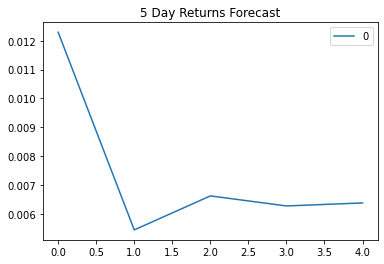

In [25]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

## Forecasting the Settle Price using an ARIMA Model

In [26]:

from statsmodels.tsa.arima_model import ARIMA

In [28]:
model = ARIMA(yen_futures['Settle'], order=(5, 1, 1))
results = model.fit()

C:\Users\wdamr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\wdamr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Tue, 01 Sep 2020   AIC                          83905.238
Time:                        11:08:49   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3162      0.700      0.452      0.651      -1.056       1.688
ar.L1.D.Settle     0.2827      0.699      0.405      0.686      -1.087       1.652
ar.L2.D.Settle     0.0007      0.016      0.043      0.965      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0136      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0011      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2977      0.699     -0.426      0.670      -1.667       1.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8924           -1.3781j            2.3410           -0.1002
AR.2            1.8924           +1.3781j            2.3410            0.1002
AR.3           -2.2727           -3.0190j            3.7789           -0.3527
AR.4           -2.2727           +3.0190j            3.7789            0.3527
AR.5          -11.1594           -0.0000j           11.1594           -0.5000
MA.1            3.3589           +0.0000j            3.3589            0.0000
-----------------------------------------------------------------------------
"""

#### 5 Day Forecast

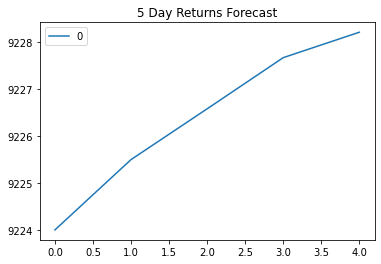

In [30]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

## Volatility Forecasting with GARCH

In [34]:
import arch
from arch import arch_model

In [38]:
model = arch_model(returns['Settle'], mean="Zero", vol="GARCH", p=1,q=1)

res = model.fit(disp="off")

In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14929.9
Method:            Maximum Likelihood   BIC:                           14950.6
                                        No. Observations:                 7514
Date:                Tue, Sep 01 2020   Df Residuals:                     7511
Time:                        11:11:52   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.2895e-03  1.798e-03      2.385  1.707e-02 [7.646e-04,7.814e-03]
alpha[1]       0.0381  8.773e-03      4.341  1.419e-05 [2.089e-02,5.528e-02]
beta[1]        0.9536  1.114e-02     85.623      0.000     [  0.932,  0.975]
============================================================================

Covariance estimator: robust
"""

In [43]:
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [44]:
forecast_horizon = 5

forecasts = res.forecast(start=last_day, horizon=forecast_horizon)
forecasts

In [47]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434026,7.475721,7.516842,7.5574,7.597407


In [48]:
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434026
h.2,7.475721
h.3,7.516842
h.4,7.557400
h.5,7.597407


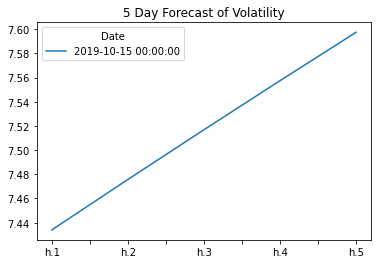

In [50]:
final.plot(title='5 Day Forecast of Volatility', legend=True)

## Conclusions

##### Volatiliy is expected to increase.